In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sortedData = []

for i in range(30):
    sortedData.append([])

with open('build/load.csv','rt')as f:
  data = csv.reader(f)
  for row in data:
        if not row[0] == "time":
            for i in range(1, len(row)-1):
                sortedData[i-1].append(int(row[i]))

In [3]:
print(len(sortedData[0]))

516


In [4]:
def movingaverage(interval, window_size):
  window = np.ones(int(window_size))/float(window_size)
  return np.convolve(interval, window, 'same')
def avg(lst):
    return sum(lst) / len(lst)

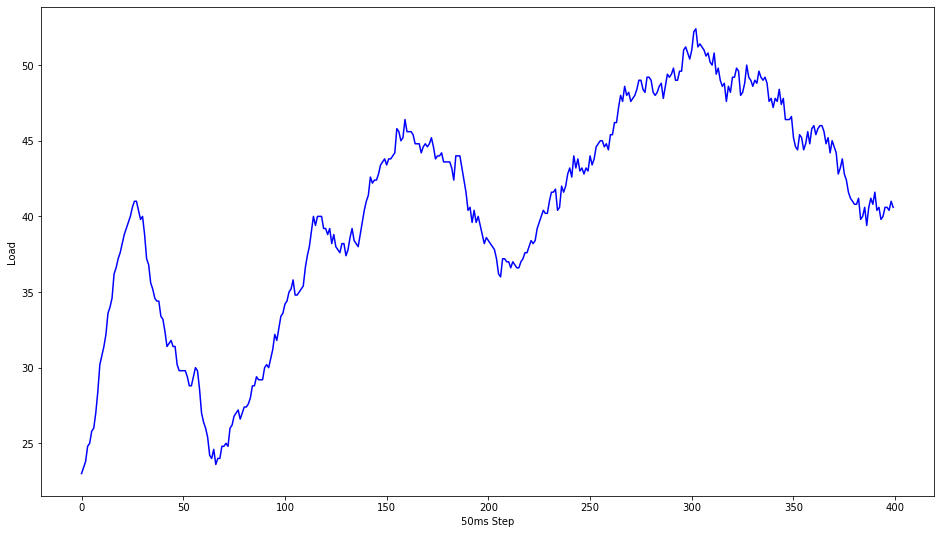

In [11]:
windowSize = 50
window = np.ones(int(windowSize))/float(windowSize)
movingAverage = np.convolve(sortedData[27], window, 'same')

plt.rc('figure', figsize=(16, 9))
plt.plot(movingAverage[:400], "b", markersize=1)
plt.ylabel('Load')
plt.xlabel('50ms Step')
plt.show()

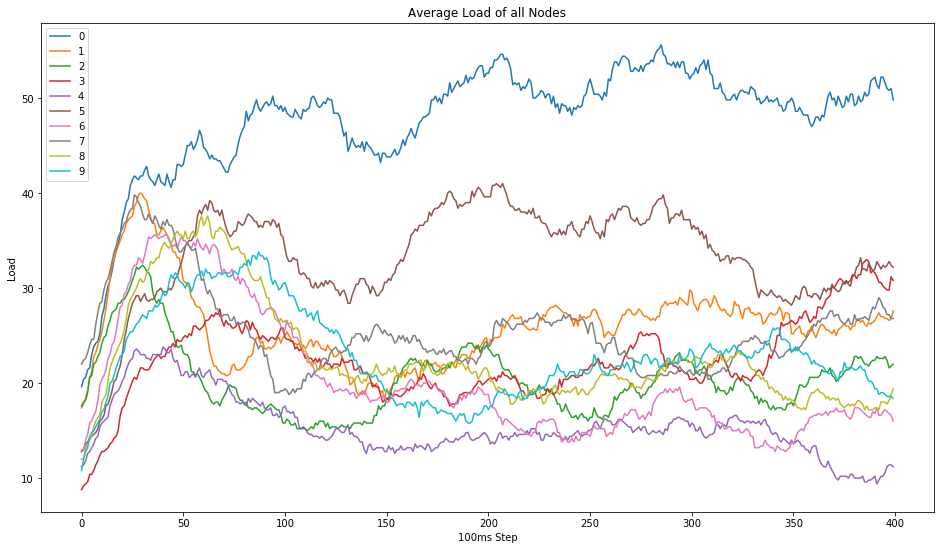

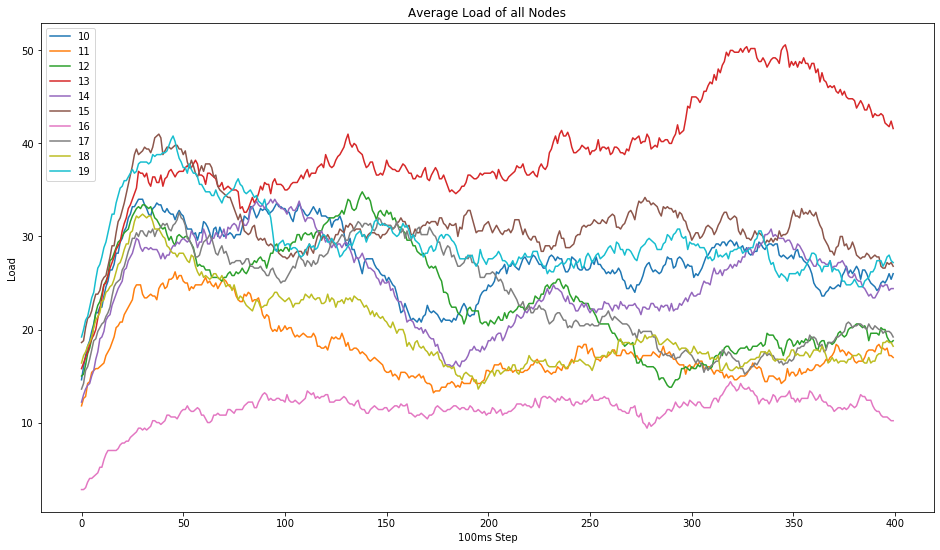

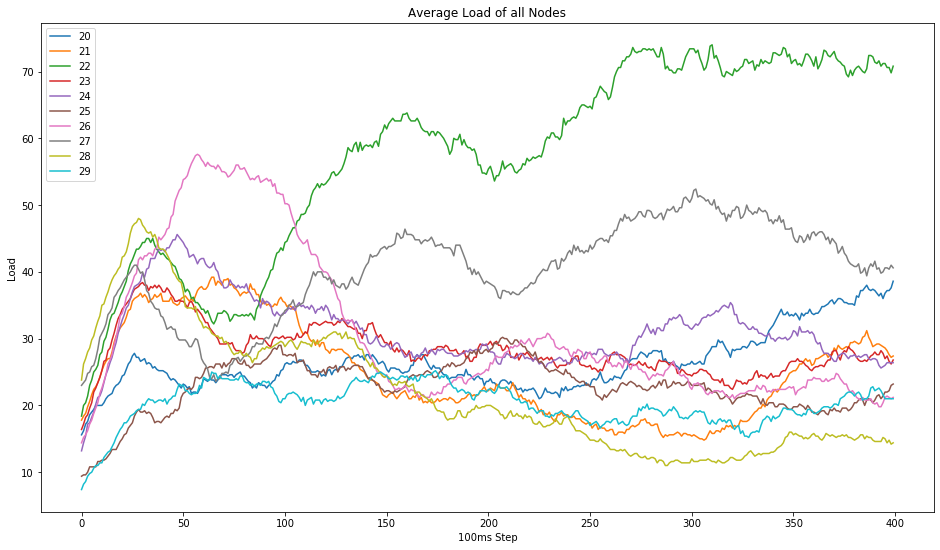

In [18]:
windowSize = 50
maxColors = 10

for j in range(int(len(sortedData)/maxColors)):
    plt.rc('figure', figsize=(16, 9))
    fig, ax = plt.subplots()
    
    for i in range(maxColors):
        y_av = movingaverage(sortedData[i+(maxColors*j)], windowSize)
        ax.plot(y_av[:400], linestyle='-', label=i+(j*maxColors))

    ax.legend()
    plt.title("Average Load of all Nodes")
    plt.xlabel('100ms Step')
    plt.ylabel('Load')
    plt.savefig('AverageLoadOverTime.png')
    plt.show()

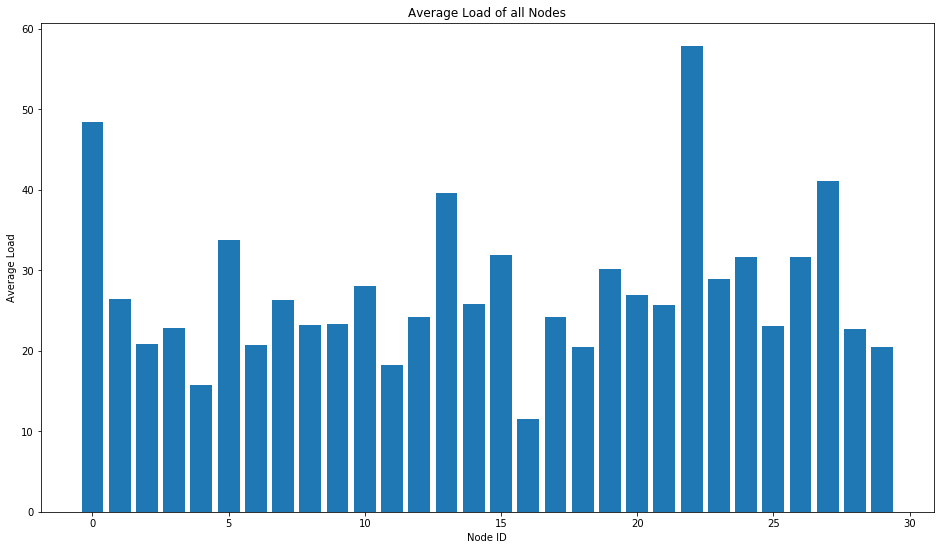

In [7]:
averages = []

for i in range(30):
    averages.append(avg(sortedData[i][:400]))

plt.title("Average Load of all Nodes")
plt.rc('figure', figsize=(16, 9))
plt.bar(range(30),averages)
plt.ylabel('Average Load')
plt.xlabel('Node ID')
plt.savefig('AverageLoad.png')
plt.show()

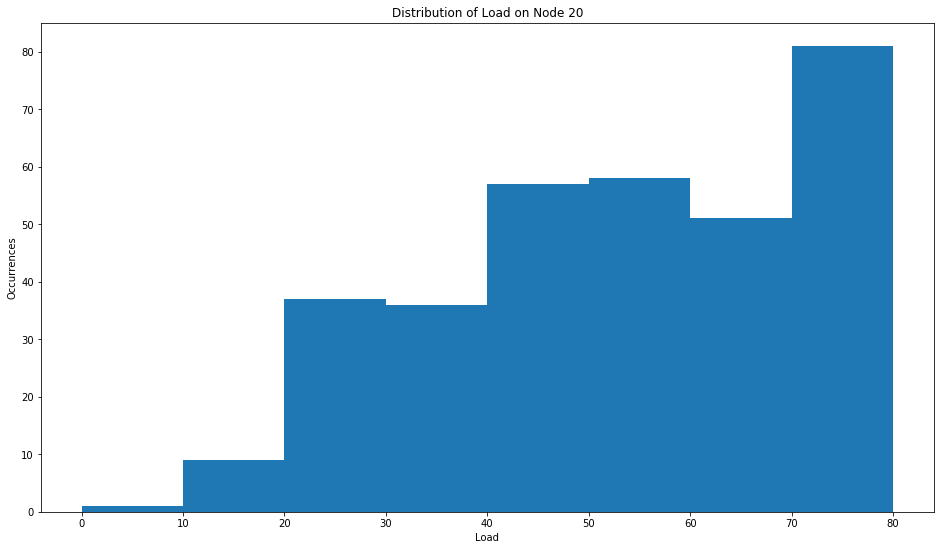

In [8]:
plt.rc('figure', figsize=(16, 9))
plt.title("Distribution of Load on Node 20")
plt.hist(sortedData[22][:400], bins=[0,10,20,30,40,50,60,70,80])
plt.ylabel('Occurrences')
plt.xlabel('Load')
plt.savefig('HistogramLoad20.png')
plt.show()